In [1]:
import cv2
from model import PeopleFinder
import os
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import PIL
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
from torchvision import datasets, models, transforms
import numpy as np

In [2]:
params_path = os.path.join(".", "peopleFinder.bin")
model = PeopleFinder(params_path)

.\dataset\test\nopeople\006060.jpg
torch.Size([1, 3, 224, 224])
tensor([[-1.0991,  0.2337]], grad_fn=<AddmmBackward0>)
tensor([1])
there is someone!


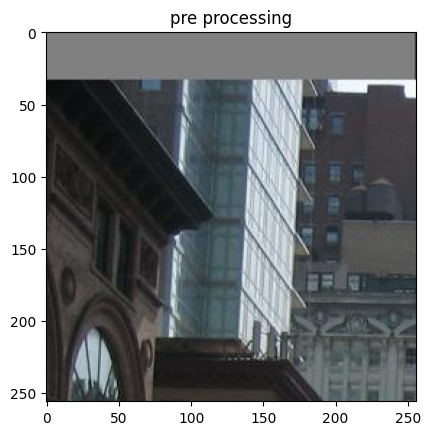

In [7]:
#test 1

parentDir = os.path.join(".","dataset","test")
_, dirs, _ = next(os.walk(parentDir))
category = os.path.join(parentDir, random.choice(dirs))
pic = os.path.join(category,random.choice(os.listdir(category)))
print(pic)

img = cv2.imread(pic)
toShow = img.copy()
toShow = cv2.cvtColor(toShow, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(toShow)
plt.title("pre processing")
plt.plot()

result = model.checkIfThereIsPeople(img)
r = "there is someone!" if result else "there is nobody!"
print(r)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted:  tensor([1])


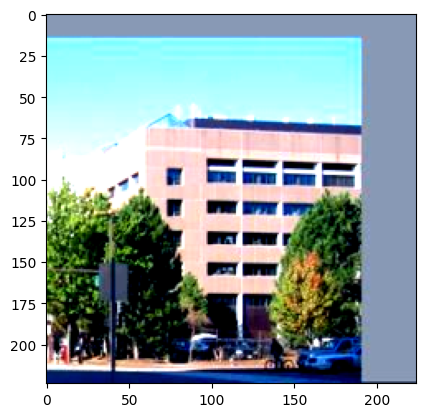

In [4]:
#test 2


data_dir = os.path.join(".", "dataset")
input_size = model.resnet_input_size
data_transforms = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), data_transforms)
dl_test = DataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=0)

input, y_true = next(iter(dl_test))
plt.figure()
toShow = input[0].moveaxis(0,-1)
toShow = (toShow + 1)/2 #just for visualization
plt.imshow(toShow)
plt.plot()

y_pred = model.model(input)
y_pred = torch.argmax(y_pred, dim=1)
print("predicted: ", y_pred)